In [2]:
import networkx as nx
import pandas as pd

# Load the data
df = pd.read_csv('london_flows.csv')

# Create a graph from the data
G = nx.from_pandas_edgelist(df, 'station_origin', 'station_destination', create_using=nx.Graph())

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Get top 10 nodes for each centrality measure
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Output the results
print("Top 10 nodes by Degree Centrality:")
for station, value in top_degree:
    print(f"{station}: {value:.4f}")

print("\nTop 10 nodes by Closeness Centrality:")
for station, value in top_closeness:
    print(f"{station}: {value:.4f}")

print("\nTop 10 nodes by Betweenness Centrality:")
for station, value in top_betweenness:
    print(f"{station}: {value:.4f}")


Top 10 nodes by Degree Centrality:
Stratford: 0.9221
Highbury & Islington: 0.8065
Whitechapel: 0.7814
West Brompton: 0.7764
Canary Wharf: 0.7714
Canada Water: 0.7714
Liverpool Street: 0.7688
Bank and Monument: 0.7663
Richmond: 0.7663
Canning Town: 0.7638

Top 10 nodes by Closeness Centrality:
Stratford: 0.9277
Highbury & Islington: 0.8361
Whitechapel: 0.8206
West Brompton: 0.8172
Canada Water: 0.8139
Bank and Monument: 0.8106
Canary Wharf: 0.8106
Richmond: 0.8106
Canning Town: 0.8089
Liverpool Street: 0.8089

Top 10 nodes by Betweenness Centrality:
Stratford: 0.0986
Liverpool Street: 0.0343
Bank and Monument: 0.0280
Canary Wharf: 0.0280
Canning Town: 0.0278
West Ham: 0.0246
Highbury & Islington: 0.0230
Whitechapel: 0.0197
Canada Water: 0.0179
Shadwell: 0.0171


In [4]:
import networkx as nx
import pandas as pd

# Load the data
df = pd.read_csv('london_flows.csv')

# Removing duplicate edges (if any)
df = df.drop_duplicates(subset=['station_origin', 'station_destination'])

# Create a graph from the data
G = nx.from_pandas_edgelist(df, 'station_origin', 'station_destination', create_using=nx.Graph())

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Get top 10 nodes for each centrality measure
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Output the results
print("Top 10 nodes by Degree Centrality:")
for station, value in top_degree:
    print(f"{station}: {value:.4f}")

print("\nTop 10 nodes by Closeness Centrality:")
for station, value in top_closeness:
    print(f"{station}: {value:.4f}")

print("\nTop 10 nodes by Betweenness Centrality:")
for station, value in top_betweenness:
    print(f"{station}: {value:.4f}")


Top 10 nodes by Degree Centrality:
Stratford: 0.9221
Highbury & Islington: 0.8065
Whitechapel: 0.7814
West Brompton: 0.7764
Canary Wharf: 0.7714
Canada Water: 0.7714
Liverpool Street: 0.7688
Bank and Monument: 0.7663
Richmond: 0.7663
Canning Town: 0.7638

Top 10 nodes by Closeness Centrality:
Stratford: 0.9277
Highbury & Islington: 0.8361
Whitechapel: 0.8206
West Brompton: 0.8172
Canada Water: 0.8139
Bank and Monument: 0.8106
Canary Wharf: 0.8106
Richmond: 0.8106
Canning Town: 0.8089
Liverpool Street: 0.8089

Top 10 nodes by Betweenness Centrality:
Stratford: 0.0986
Liverpool Street: 0.0343
Bank and Monument: 0.0280
Canary Wharf: 0.0280
Canning Town: 0.0278
West Ham: 0.0246
Highbury & Islington: 0.0230
Whitechapel: 0.0197
Canada Water: 0.0179
Shadwell: 0.0171


In [5]:
import pandas as pd
import networkx as nx

# Load data
london_flows = pd.read_csv('london_flows.csv')

# Create a directed graph from the dataframe
G = nx.from_pandas_edgelist(london_flows, 'station_origin', 'station_destination', ['flows', 'distance'], create_using=nx.DiGraph())

def compute_network_efficiency(G):
    """
    Compute the network efficiency of the graph G.
    """
    # Calculate the shortest path lengths for all pairs of nodes
    lengths = dict(nx.all_pairs_shortest_path_length(G))
    
    total = 0
    n = len(G)
    
    # Sum the inverses of the shortest path lengths
    for source, targets in lengths.items():
        for target, length in targets.items():
            if length > 0:  # Avoid division by zero
                total += 1 / length
                
    # Compute the network efficiency
    efficiency = total / (n * (n - 1))
    return efficiency

def compute_lcc_size(G):
    """
    Compute the size of the largest connected component in the graph G.
    """
    # As the graph is directed, we'll use strongly_connected_components
    components = list(nx.strongly_connected_components(G))
    lcc_size = max(len(comp) for comp in components)
    return lcc_size

# Compute baseline measures
baseline_efficiency = compute_network_efficiency(G)
baseline_lcc_size = compute_lcc_size(G)

# Selecting a subset of stations for analysis
stations_to_remove = [
    "Stratford", "Highbury & Islington", "Whitechapel", "West Brompton",
    "Canary Wharf", "Canada Water", "Liverpool Street", "Bank and Monument", 
    "Richmond", "Canning Town"
]

# Compute impact measures after removal
impact_results = []
for station in stations_to_remove:
    G_removed = G.copy()
    G_removed.remove_node(station)
    efficiency_after_removal = compute_network_efficiency(G_removed)
    lcc_size_after_removal = compute_lcc_size(G_removed)
    impact_results.append({
        "Station": station,
        "Efficiency Drop": baseline_efficiency - efficiency_after_removal,
        "LCC Size Change": baseline_lcc_size - lcc_size_after_removal
    })

impact_df = pd.DataFrame(impact_results)
print(impact_df)


                Station  Efficiency Drop  LCC Size Change
0             Stratford         0.005653                1
1  Highbury & Islington         0.001025                1
2           Whitechapel         0.000985                1
3         West Brompton         0.000929                1
4          Canary Wharf         0.000960                1
5          Canada Water         0.000965                1
6      Liverpool Street         0.001051                1
7     Bank and Monument         0.000960                1
8              Richmond         0.000916                1
9          Canning Town         0.000942                1


In [6]:
import pandas as pd
import networkx as nx

# 定义网络效率和LCC大小的计算函数
def compute_network_efficiency(G):
    lengths = dict(nx.all_pairs_shortest_path_length(G))
    total = 0
    n = len(G)
    for source, targets in lengths.items():
        for target, length in targets.items():
            if length > 0:
                total += 1 / length
    efficiency = total / (n * (n - 1))
    return efficiency

def compute_lcc_size(G):
    components = list(nx.strongly_connected_components(G))
    lcc_size = max(len(comp) for comp in components)
    return lcc_size

# 加载数据并初始化网络
london_flows = pd.read_csv('london_flows.csv')
G = nx.from_pandas_edgelist(london_flows, 'station_origin', 'station_destination', ['flows', 'distance'], create_using=nx.DiGraph())
baseline_efficiency = compute_network_efficiency(G)
baseline_lcc_size = compute_lcc_size(G)

# 非顺序节点移除策略
stations_to_remove = ["Stratford", "Highbury & Islington", "Whitechapel", "West Brompton", "Canary Wharf", "Canada Water", "Liverpool Street", "Bank and Monument", "Richmond", "Canning Town"]
G_non_seq = G.copy()
non_seq_results = []
for station in stations_to_remove:
    G_non_seq.remove_node(station)
    efficiency_drop = baseline_efficiency - compute_network_efficiency(G_non_seq)
    lcc_size_change = baseline_lcc_size - compute_lcc_size(G_non_seq)
    non_seq_results.append({
        "Station": station,
        "Efficiency Drop (Non-Seq)": efficiency_drop,
        "LCC Size Change (Non-Seq)": lcc_size_change
    })
non_seq_df_degree = pd.DataFrame(non_seq_results)

# 顺序节点移除策略
G_seq = G.copy()
seq_results = []
for _ in range(10):
    centrality = nx.degree_centrality(G_seq)
    station_to_remove = max(centrality, key=centrality.get)
    G_seq.remove_node(station_to_remove)
    efficiency_drop = baseline_efficiency - compute_network_efficiency(G_seq)
    lcc_size_change = baseline_lcc_size - compute_lcc_size(G_seq)
    seq_results.append({
        "Station": station_to_remove,
        "Efficiency Drop (Seq)": efficiency_drop,
        "LCC Size Change (Seq)": lcc_size_change
    })
seq_df_degree = pd.DataFrame(seq_results)

# 合并度中心性的结果
merged_results_degree = pd.merge(non_seq_df_degree, seq_df_degree, on="Station", how="outer")

print(merged_results_degree)


                Station  Efficiency Drop (Non-Seq)  LCC Size Change (Non-Seq)  \
0             Stratford                   0.005653                          1   
1  Highbury & Islington                   0.006714                          2   
2           Whitechapel                   0.007740                          3   
3         West Brompton                   0.008715                          4   
4          Canary Wharf                   0.009731                          5   
5          Canada Water                   0.013188                          6   
6      Liverpool Street                   0.023917                          7   
7     Bank and Monument                   0.025235                          8   
8              Richmond                   0.026317                          9   
9          Canning Town                   0.030421                         10   

   Efficiency Drop (Seq)  LCC Size Change (Seq)  
0               0.005653                      1  
1       

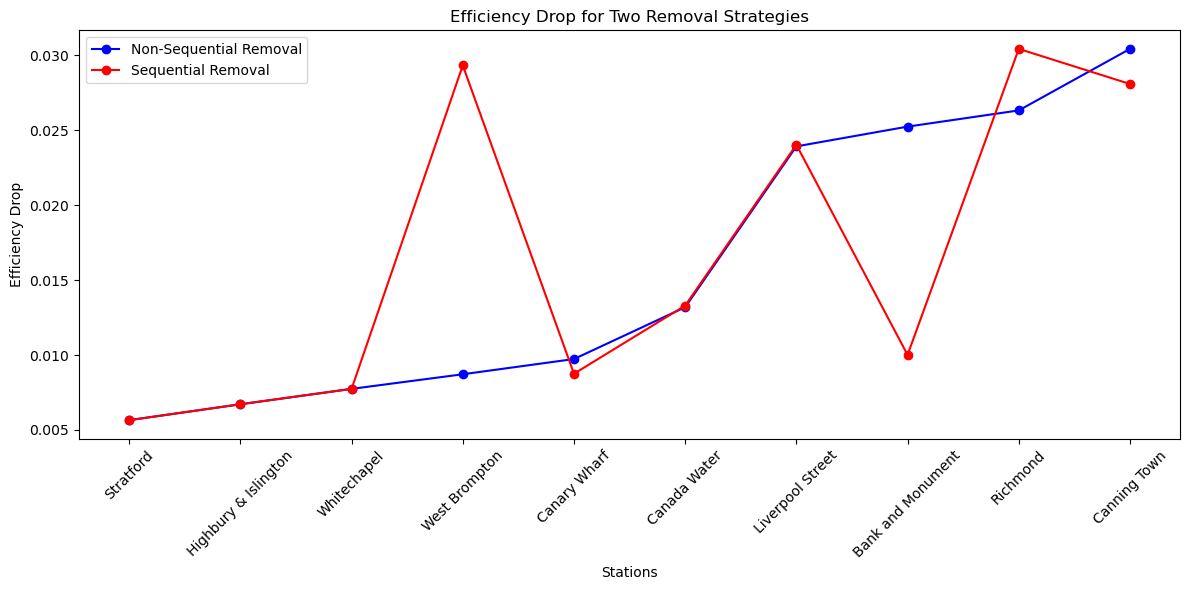

In [9]:
import matplotlib.pyplot as plt

# 折线图数据
stations = merged_results_degree['Station']
efficiency_drop_non_seq = merged_results_degree['Efficiency Drop (Non-Seq)']
efficiency_drop_seq = merged_results_degree['Efficiency Drop (Seq)']

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(stations, efficiency_drop_non_seq, label="Non-Sequential Removal", marker='o', color='blue')
plt.plot(stations, efficiency_drop_seq, label="Sequential Removal", marker='o', color='red')
plt.title("Efficiency Drop for Two Removal Strategies")
plt.xlabel("Stations")
plt.ylabel("Efficiency Drop")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')  # 请确保文件路径正确

# 2. 构建加权图
G = nx.DiGraph()
for _, row in flows_data.iterrows():
    G.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

# 3. 基于加权的介数中心性计算车站的重要性
betweenness_centrality = nx.betweenness_centrality(G, weight='weight', normalized=True)

# 4. 根据介数中心性对车站进行排序，并获取前10个
top_10_stations = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print(top_10_stations)


[('West Ham', 2.1008782426871e+62), ('Bank and Monument', 1.6913745089111568e+61), ('Stratford', 6.486950941082152e+60), ('North Wembley', 5.312595021150065e+58), ('Kensington', 1.4377622598578917e+58), ('Harlesden', 1.3559751187687769e+58), ('Custom House', 3.392501601594312e+57), ('Prince Regent', 1.6229595672848157e+57), ('Gallions Reach', 1.622959566428818e+57), ('Kensal Green', 3.726588716122485e+56)]


In [4]:
import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')  # 请确保文件路径正确

# 2. 构建加权图
G = nx.DiGraph()
for _, row in flows_data.iterrows():
    G.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

# 3. 计算加权度中心性
weighted_degree_centrality = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}
top_10_weighted_degree = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Weighted Degree Centrality:", top_10_weighted_degree)

# 4. 计算加权紧密中心性
weighted_closeness_centrality = nx.closeness_centrality(G, distance='weight')
top_10_weighted_closeness = sorted(weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Weighted Closeness Centrality:", top_10_weighted_closeness)

# 5. 计算加权介数中心性
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
top_10_weighted_betweenness = sorted(weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Weighted Betweenness Centrality:", top_10_weighted_betweenness)


Top 10 nodes by Weighted Degree Centrality: [('Waterloo', 67372), ('Stratford', 59311), ('Victoria', 37517), ('London Bridge', 32597), ('Liverpool Street', 31473), ('Bank and Monument', 29494), ("King's Cross St. Pancras", 28307), ('Canada Water', 27026), ('Finsbury Park', 24735), ('Highbury & Islington', 23714)]
Top 10 nodes by Weighted Closeness Centrality: [('Manor Park', 1.722943722943723), ('Abbey Road', 1.6652719665271967), ('Bank and Monument', 1.6652719665271967), ('Beckton', 1.6652719665271967), ('Blackwall', 1.6652719665271967), ('Canary Wharf', 1.6652719665271967), ('Canning Town', 1.6652719665271967), ('Crossharbour', 1.6652719665271967), ('Custom House', 1.6652719665271967), ('Cutty Sark', 1.6652719665271967)]
Top 10 nodes by Weighted Betweenness Centrality: [('West Ham', 2.1008782426871e+62), ('Bank and Monument', 1.6913745089111568e+61), ('Stratford', 6.486950941082152e+60), ('North Wembley', 5.312595021150065e+58), ('Kensington', 1.4377622598578917e+58), ('Harlesden', 1

In [6]:
import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')  # 请确保文件路径正确

# 2. 构建加权图
G = nx.DiGraph()
for _, row in flows_data.iterrows():
    G.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

N = G.number_of_nodes()

# 3. 计算加权度中心性并归一化
weighted_degree_centrality = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) / (N-1) for node in G.nodes()}
top_10_weighted_degree = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Degree Centrality:", top_10_weighted_degree)

# 4. 计算加权紧密中心性 (已经是归一化的)
weighted_closeness_centrality = nx.closeness_centrality(G, distance='weight')
top_10_weighted_closeness = sorted(weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Closeness Centrality:", top_10_weighted_closeness)

# 5. 计算加权介数中心性并归一化
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
normalized_weighted_betweenness_centrality = {node: value / ((N-1)*(N-2)) for node, value in weighted_betweenness_centrality.items()}
top_10_weighted_betweenness = sorted(normalized_weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Betweenness Centrality:", top_10_weighted_betweenness)


Top 10 nodes by Normalized Weighted Degree Centrality: [('Waterloo', 169.27638190954775), ('Stratford', 149.02261306532662), ('Victoria', 94.26381909547739), ('London Bridge', 81.90201005025126), ('Liverpool Street', 79.07788944723617), ('Bank and Monument', 74.10552763819095), ("King's Cross St. Pancras", 71.12311557788945), ('Canada Water', 67.90452261306532), ('Finsbury Park', 62.14824120603015), ('Highbury & Islington', 59.58291457286432)]
Top 10 nodes by Normalized Weighted Closeness Centrality: [('Manor Park', 1.722943722943723), ('Abbey Road', 1.6652719665271967), ('Bank and Monument', 1.6652719665271967), ('Beckton', 1.6652719665271967), ('Blackwall', 1.6652719665271967), ('Canary Wharf', 1.6652719665271967), ('Canning Town', 1.6652719665271967), ('Crossharbour', 1.6652719665271967), ('Custom House', 1.6652719665271967), ('Cutty Sark', 1.6652719665271967)]
Top 10 nodes by Normalized Weighted Betweenness Centrality: [('West Ham', 1.3296192819811275e+57), ('Bank and Monument', 1.

In [7]:
import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')  # 请确保文件路径正确

# 2. 构建加权图
G = nx.DiGraph()
for _, row in flows_data.iterrows():
    G.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

N = G.number_of_nodes()

# 3. 计算加权度中心性并归一化
weighted_degree_centrality = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}
max_degree = max(weighted_degree_centrality.values())
normalized_weighted_degree_centrality = {node: value / max_degree for node, value in weighted_degree_centrality.items()}
top_10_weighted_degree = sorted(normalized_weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Degree Centrality:", top_10_weighted_degree)

# 4. 计算加权紧密中心性
weighted_closeness_centrality = nx.closeness_centrality(G, distance='weight')
max_closeness = max(weighted_closeness_centrality.values())
normalized_weighted_closeness_centrality = {node: value / max_closeness for node, value in weighted_closeness_centrality.items()}
top_10_weighted_closeness = sorted(normalized_weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Closeness Centrality:", top_10_weighted_closeness)

# 5. 计算加权介数中心性并归一化
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
max_betweenness = max(weighted_betweenness_centrality.values())
normalized_weighted_betweenness_centrality = {node: value / max_betweenness for node, value in weighted_betweenness_centrality.items()}
top_10_weighted_betweenness = sorted(normalized_weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Betweenness Centrality:", top_10_weighted_betweenness)


Top 10 nodes by Normalized Weighted Degree Centrality: [('Waterloo', 1.0), ('Stratford', 0.8803508876090957), ('Victoria', 0.5568633853826516), ('London Bridge', 0.48383601496170514), ('Liverpool Street', 0.4671525262720418), ('Bank and Monument', 0.43777830552751884), ("King's Cross St. Pancras", 0.4201597102653922), ('Canada Water', 0.40114587662530427), ('Finsbury Park', 0.36714065190286765), ('Highbury & Islington', 0.3519859882443745)]
Top 10 nodes by Normalized Weighted Closeness Centrality: [('Manor Park', 1.0), ('Abbey Road', 0.9665271966527197), ('Bank and Monument', 0.9665271966527197), ('Beckton', 0.9665271966527197), ('Blackwall', 0.9665271966527197), ('Canary Wharf', 0.9665271966527197), ('Canning Town', 0.9665271966527197), ('Crossharbour', 0.9665271966527197), ('Custom House', 0.9665271966527197), ('Cutty Sark', 0.9665271966527197)]
Top 10 nodes by Normalized Weighted Betweenness Centrality: [('West Ham', 1.0), ('Bank and Monument', 0.08050797397700815), ('Stratford', 0.

In [12]:
import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')  # 请确保文件路径正确

# 2. 构建加权图
G = nx.DiGraph()
for _, row in flows_data.iterrows():
    inv_flow = 1/row['flows'] if row['flows'] != 0 else float('inf')
    G.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'], inv_weight=inv_flow)

N = G.number_of_nodes()

# 3. 计算加权度中心性并归一化
weighted_degree_centrality = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}
max_degree = max(weighted_degree_centrality.values())
normalized_weighted_degree_centrality = {node: value / max_degree if max_degree != 0 else 0 for node, value in weighted_degree_centrality.items()}
top_10_weighted_degree = sorted(normalized_weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Degree Centrality:", top_10_weighted_degree)

# 4. 计算加权紧密中心性
weighted_closeness_centrality = nx.closeness_centrality(G, distance='inv_weight')
max_closeness = max(weighted_closeness_centrality.values())
normalized_weighted_closeness_centrality = {node: value / max_closeness if max_closeness != 0 else 0 for node, value in weighted_closeness_centrality.items()}
top_10_weighted_closeness = sorted(normalized_weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Closeness Centrality:", top_10_weighted_closeness)

# 5. 计算加权介数中心性并归一化
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight='inv_weight')
max_betweenness = max(weighted_betweenness_centrality.values())
normalized_weighted_betweenness_centrality = {node: value / max_betweenness if max_betweenness != 0 else 0 for node, value in weighted_betweenness_centrality.items()}
top_10_weighted_betweenness = sorted(normalized_weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Betweenness Centrality:", top_10_weighted_betweenness)


Top 10 nodes by Normalized Weighted Degree Centrality: [('Waterloo', 1.0), ('Stratford', 0.8803508876090957), ('Victoria', 0.5568633853826516), ('London Bridge', 0.48383601496170514), ('Liverpool Street', 0.4671525262720418), ('Bank and Monument', 0.43777830552751884), ("King's Cross St. Pancras", 0.4201597102653922), ('Canada Water', 0.40114587662530427), ('Finsbury Park', 0.36714065190286765), ('Highbury & Islington', 0.3519859882443745)]
Top 10 nodes by Normalized Weighted Closeness Centrality: [('Abbey Road', 0), ('Bank and Monument', 0), ('Beckton', 0), ('Blackwall', 0), ('Canary Wharf', 0), ('Canning Town', 0), ('Crossharbour', 0), ('Custom House', 0), ('Cutty Sark', 0), ('Cyprus', 0)]
Top 10 nodes by Normalized Weighted Betweenness Centrality: [('Shadwell', 1.0), ('Hackney Central', 0.0011072455069568571), ('Canada Water', 0.0010751785405311155), ('Homerton', 9.76047981669307e-06), ('Camden Road', 1.778072968726664e-07), ('Haggerston', 1.5380947933334888e-07), ('Gospel Oak', 2.2

In [ ]:
RESULT
[('Bank and Monument', 1.0),
 ('Liverpool Street', 0.9966541910421303),
 ('Canary Wharf', 0.9919831044979475),
 ('Farringdon', 0.9863152272152099),
 ('Oxford Circus', 0.966437289920816),
 ("King's Cross St. Pancras", 0.9475906559047189),
 ('Holborn', 0.9426240699248346),
 ('Waterloo', 0.936469142327811),
 ('Paddington', 0.9245594097112507),
 ('Chancery Lane', 0.9215613434084409)]

In [14]:
# Removing edges with zero flow
edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] == 0]
G.remove_edges_from(edges_to_remove)

# Adjusting the weights for closeness centrality
for _, _, data in G.edges(data=True):
    data['inv_weight'] = 1 / data['weight']

# Recompute the weighted closeness centrality
weighted_closeness_centrality = nx.closeness_centrality(G, distance='inv_weight')

# Normalize the closeness centrality
max_closeness = max(weighted_closeness_centrality.values())
normalized_weighted_closeness_centrality = {node: value / max_closeness for node, value in weighted_closeness_centrality.items()}

# Sort and get the top 10 nodes
top_10_weighted_closeness = sorted(normalized_weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_weighted_closeness


[('Bank and Monument', 1.0),
 ('Liverpool Street', 0.9966541910421303),
 ('Canary Wharf', 0.9919831044979475),
 ('Farringdon', 0.9863152272152099),
 ('Oxford Circus', 0.966437289920816),
 ("King's Cross St. Pancras", 0.9475906559047189),
 ('Holborn', 0.9426240699248346),
 ('Waterloo', 0.936469142327811),
 ('Paddington', 0.9245594097112507),
 ('Chancery Lane', 0.9215613434084409)]

In [15]:
import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')  # 请确保文件路径正确

# 2. 构建加权图
G = nx.DiGraph()
for _, row in flows_data.iterrows():
    G.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

# Removing edges with zero flow
edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] == 0]
G.remove_edges_from(edges_to_remove)

# Adjusting the weights for closeness centrality
for _, _, data in G.edges(data=True):
    data['inv_weight'] = 1 / data['weight']

# 3. Recompute the weighted closeness centrality
weighted_closeness_centrality = nx.closeness_centrality(G, distance='inv_weight')

# 4. Normalize the closeness centrality
max_closeness = max(weighted_closeness_centrality.values())
normalized_weighted_closeness_centrality = {node: value / max_closeness for node, value in weighted_closeness_centrality.items()}

# 5. Sort and get the top 10 nodes
top_10_weighted_closeness = sorted(normalized_weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Closeness Centrality:", top_10_weighted_closeness)


Top 10 nodes by Normalized Weighted Closeness Centrality: [('Bank and Monument', 1.0), ('Liverpool Street', 0.9966541910421303), ('Canary Wharf', 0.9919831044979475), ('Farringdon', 0.9863152272152099), ('Oxford Circus', 0.966437289920816), ("King's Cross St. Pancras", 0.9475906559047189), ('Holborn', 0.9426240699248346), ('Waterloo', 0.936469142327811), ('Paddington', 0.9245594097112507), ('Chancery Lane', 0.9215613434084409)]


In [20]:
import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')

# 2. 构建加权图
G = nx.DiGraph()
for _, row in flows_data.iterrows():
    G.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

# Removing edges with zero flow
edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] == 0]
G.remove_edges_from(edges_to_remove)

# Adjusting the weights for betweenness centrality (using inverse of flow)
for _, _, data in G.edges(data=True):
    data['inv_weight'] = 1 / data['weight']

# 5. 计算加权介数中心性并归一化
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight='inv_weight')
max_betweenness = max(weighted_betweenness_centrality.values())
normalized_weighted_betweenness_centrality = {node: value / max_betweenness for node, value in weighted_betweenness_centrality.items()}
top_10_weighted_betweenness = sorted(normalized_weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Betweenness Centrality:", top_10_weighted_betweenness)


Top 10 nodes by Normalized Weighted Betweenness Centrality: [('Stratford', 1.0), ('Bank and Monument', 0.8197926648662776), ('Liverpool Street', 0.7091210035717397), ('Waterloo', 0.6870110636815053), ("King's Cross St. Pancras", 0.47251502744141477), ('Victoria', 0.3807300287481488), ('Hammersmith', 0.3615820193396638), ('Paddington', 0.3471208293405349), ('Highbury & Islington', 0.2872201411272759), ('Canada Water', 0.2723930655980486)]
